In [ ]:
#Dependencies
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
nltk.download('wordnet')
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Read in data
data_path="/content/drive/My Drive/NLP/LDA-Topic Modeling/data/abcnews.csv"
data=pd.read_csv(data_path)
data.head(50)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp


In [ ]:
data.tail(50)

,publish_date,headline_text
1185968,20191231,father and son patrick and robert salway die i...
1185969,20191231,fears of property loss in tasmania
1185970,20191231,financial planners moment of truth arrives new...
1185971,20191231,fire burns at rapid bay
1185972,20191231,firefighter dies as local crews describe the s...
1185973,20191231,firefighters resort to saltwater to tackle
1185974,20191231,fires encroaching on nowra filmed by rfs
1185975,20191231,greta thunberg and david attenborough join forces
1185976,20191231,house saved; shed gone; everyones alive: danie...
1185977,20191231,how australia is celebrating new years eve


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186018 entries, 0 to 1186017
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1186018 non-null  int64 
 1   headline_text  1186018 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.1+ MB


In [ ]:
data.isnull().sum()

publish_date     0
headline_text    0
dtype: int64

In [ ]:
data.drop(['publish_date'],axis=1,inplace=True)

In [ ]:
print(data.head())
print(data.index)

                                       headline_text
0  aba decides against community broadcasting lic...
1     act fire witnesses must be aware of defamation
2     a g calls for infrastructure protection summit
3           air nz staff in aust strike for pay rise
4      air nz strike to affect australian travellers
RangeIndex(start=0, stop=1186018, step=1)


In [ ]:
#Data preprocessing
text=data.headline_text

#stemming&lemmatizing
stemmer=SnowballStemmer("english")
lemma=WordNetLemmatizer()

def preprocessing(text):
  #tokenizing
  tokens=gensim.utils.simple_preprocess(text)
  #Removing stopwords
  stopwords=gensim.parsing.preprocessing.STOPWORDS
  
  processed=[]
  for word in tokens:
    if word not in stopwords:
      processed.append(stemmer.stem(lemma.lemmatize(word,pos="v")))
  return processed
#test function
test=preprocessing(text[100])
print(test)
print(text[100])

['women', 'urg', 'councillor']
more women urged to become councillors


In [ ]:
#Mapping fuction to text
processed_text=text.map(preprocessing)
processed_text[:50]

0            [aba, decid, communiti, broadcast, licenc]
1                               [act, wit, awar, defam]
2                [call, infrastructur, protect, summit]
3             [air, nz, staff, aust, strike, pay, rise]
4         [air, nz, strike, affect, australian, travel]
5                    [ambiti, olsson, win, tripl, jump]
6                [antic, delight, record, break, barca]
7         [aussi, qualifi, stosur, wast, memphi, match]
8                 [aust, address, secur, council, iraq]
9                    [australia, lock, war, timet, opp]
10           [australia, contribut, million, aid, iraq]
11            [barca, record, robson, celebr, birthday]
12                              [bathhous, plan, ahead]
13           [big, hop, launceston, cycl, championship]
14             [big, plan, boost, paroo, water, suppli]
15                  [blizzard, buri, unit, state, bill]
16            [brigadi, dismiss, report, troop, harass]
17       [british, combat, troop, arriv, daili, 

In [ ]:
#save the original text and processed text for later use
import pickle
text.to_pickle("original_text.pkl")
processed_text.to_pickle("processed_text.pkl")

EDA

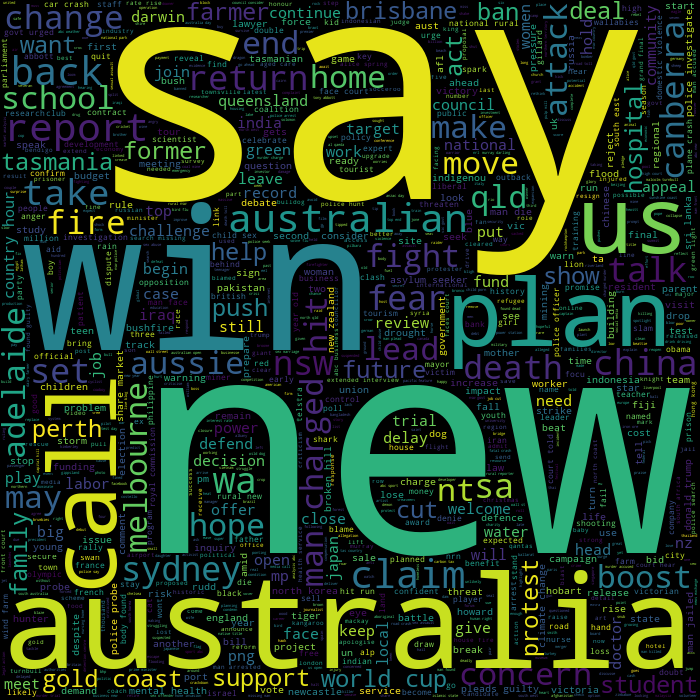

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(text.values))
wordcloud = WordCloud(width=700,height=700,background_color="black", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


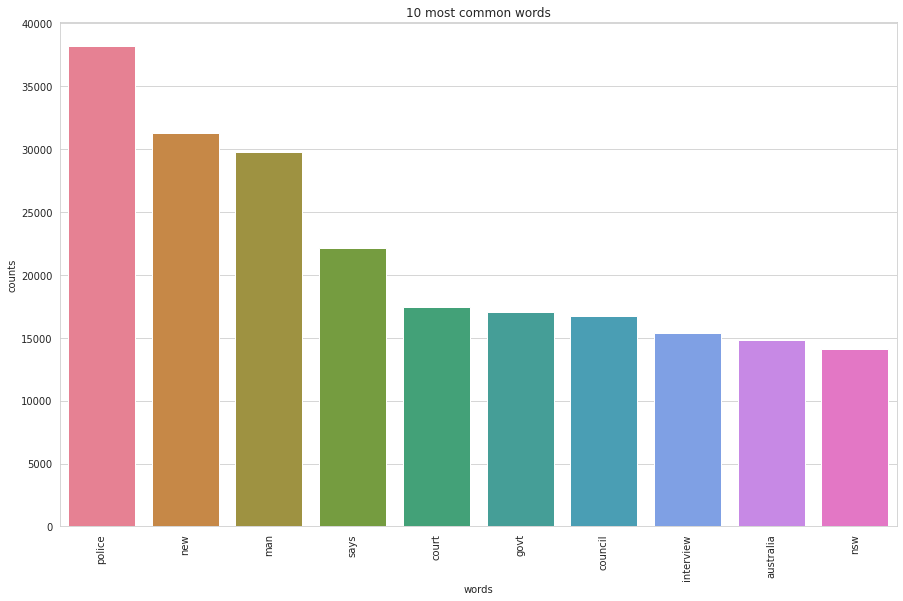

In [ ]:
#Plotting the most common 10 words
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform
count_data = count_vectorizer.fit_transform(text)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

Organizing The Data

Data need to oragnized in two formates: 

1-corpus: the collection of text

2-Document Term Matrix: words count in matrix formate

In [ ]:
#BagOfWords
dictionary=gensim.corpora.Dictionary(processed_text)
# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)
#checking...
count=0
for k,v in dictionary.iteritems():
  print(k,v)
  count+=1
  if count>20:
    break

0 aba
1 broadcast
2 communiti
3 decid
4 licenc
5 act
6 awar
7 defam
8 wit
9 call
10 infrastructur
11 protect
12 summit
13 air
14 aust
15 nz
16 pay
17 rise
18 staff
19 strike
20 affect


In [ ]:
#Bag of words Corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_text]
#checking...
print("original doc: ",text[2000])
print("Processed doc: ",processed_text[2000])
print("BOF: ",bow_corpus[2000])
for i in range(len(bow_corpus[2000])):
    print("Word {} (\"{}\") appears {} time.".format(bow_corpus[2000][i][0], 
                                                     dictionary[bow_corpus[2000][i][0]], 
                                                     bow_corpus[2000][i][1]))

original doc:  geraldton to host three major events this weekend
Processed doc:  ['geraldton', 'host', 'major', 'event', 'weekend']
BOF:  [(1490, 1), (1983, 1), (2002, 1), (2131, 1), (2860, 1)]
Word 1490 ("weekend") appears 1 time.
Word 1983 ("host") appears 1 time.
Word 2002 ("major") appears 1 time.
Word 2131 ("event") appears 1 time.
Word 2860 ("geraldton") appears 1 time.


In [ ]:
#saving Bag of words corpus
with open('BoW.pickle','wb') as b:
  pickle.dump(bow_corpus,b)

In [ ]:
#TF-IDF Vectorizer (Transforms text to feature vectors that can be used as an input for LDA model)
tfidf = models.TfidfModel(bow_corpus)
tfidf_matrix= tfidf[bow_corpus]
#checking...
tfidf_df=pd.DataFrame(tfidf_matrix)
tfidf_df.head(25)

In [ ]:
#saving TF-IDF Matrix
with open('tfidf-matrix.pickle','wb') as b:
  pickle.dump(tfidf_matrix,b)

LDA **Model**

In [ ]:
# Build LDA model
lda_model= gensim.models.LdaMulticore(corpus=tfidf_matrix, 
                                             num_topics=10, 
                                             id2word=dictionary, 
                                             passes=2, 
                                             workers=4)

In [ ]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.006*"sexual" + 0.006*"sex" + 0.006*"abus" + 0.006*"kill" + 0.005*"abbott" '
  '+ 0.005*"protest" + 0.005*"syria" + 0.005*"islam" + 0.005*"univers" + '
  '0.005*"strike"'),
 (1,
  '0.013*"rural" + 0.012*"news" + 0.011*"market" + 0.008*"weather" + '
  '0.008*"friday" + 0.007*"nation" + 0.007*"share" + 0.007*"street" + '
  '0.007*"wall" + 0.006*"australian"'),
 (2,
  '0.011*"world" + 0.010*"cup" + 0.010*"win" + 0.010*"australia" + '
  '0.009*"final" + 0.007*"leagu" + 0.007*"climat" + 0.006*"day" + '
  '0.006*"wednesday" + 0.006*"afl"'),
 (3,
  '0.020*"man" + 0.015*"polic" + 0.014*"charg" + 0.013*"murder" + '
  '0.011*"woman" + 0.011*"crash" + 0.009*"death" + 0.008*"court" + '
  '0.008*"shoot" + 0.008*"car"'),
 (4,
  '0.010*"govern" + 0.009*"elect" + 0.009*"countri" + 0.009*"hour" + '
  '0.006*"labor" + 0.006*"nsw" + 0.006*"feder" + 0.006*"wa" + 0.005*"fund" + '
  '0.005*"budget"'),
 (5,
  '0.008*"stori" + 0.007*"indigen" + 0.006*"age" + 0.006*"care" + '
  '0.005*"aborigin" + 0.0

In [ ]:
topics = lda_model.show_topics(formatted=False)
for i in topics:
  print(i)

(0, [('sexual', 0.006306146), ('sex', 0.0059106047), ('abus', 0.0058201454), ('kill', 0.0058154543), ('abbott', 0.0053025666), ('protest', 0.005189008), ('syria', 0.0046819546), ('islam', 0.0045961626), ('univers', 0.004527695), ('strike', 0.0045261127)])
(1, [('rural', 0.012816415), ('news', 0.011542902), ('market', 0.011318961), ('weather', 0.008102201), ('friday', 0.007975025), ('nation', 0.007372623), ('share', 0.0072923494), ('street', 0.00684388), ('wall', 0.0066658873), ('australian', 0.005838629)])
(2, [('world', 0.0106174145), ('cup', 0.009872228), ('win', 0.0096181035), ('australia', 0.009528796), ('final', 0.008622263), ('leagu', 0.0067229), ('climat', 0.0065653156), ('day', 0.0064018187), ('wednesday', 0.0060744095), ('afl', 0.006065268)])
(3, [('man', 0.019827824), ('polic', 0.01518496), ('charg', 0.013744382), ('murder', 0.0128488345), ('woman', 0.011213211), ('crash', 0.011183067), ('death', 0.008734975), ('court', 0.00807189), ('shoot', 0.007991893), ('car', 0.007967401

Presenting the Results

#Wordcloud of Top N words in each topic


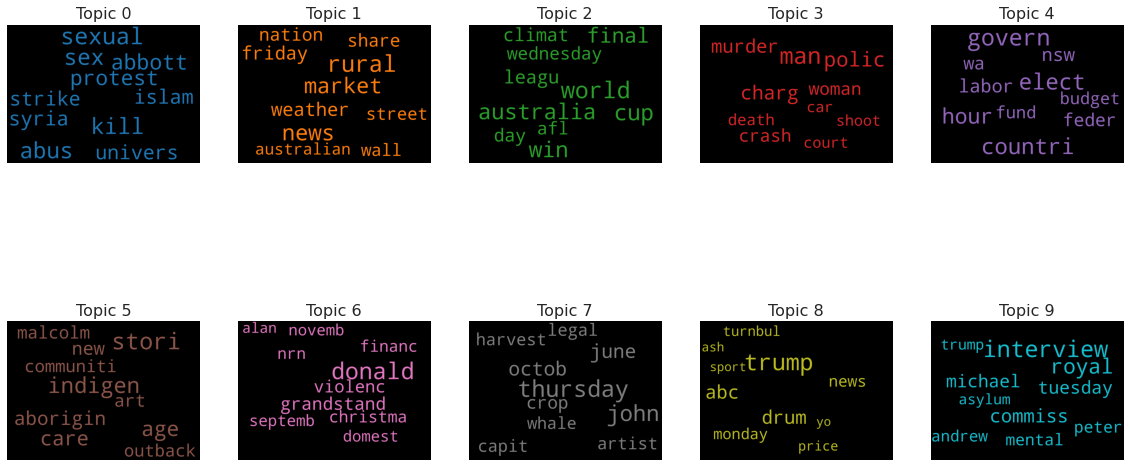

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='viridis',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(2,5, figsize=(20,10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

 Word Counts of Topic Keywords


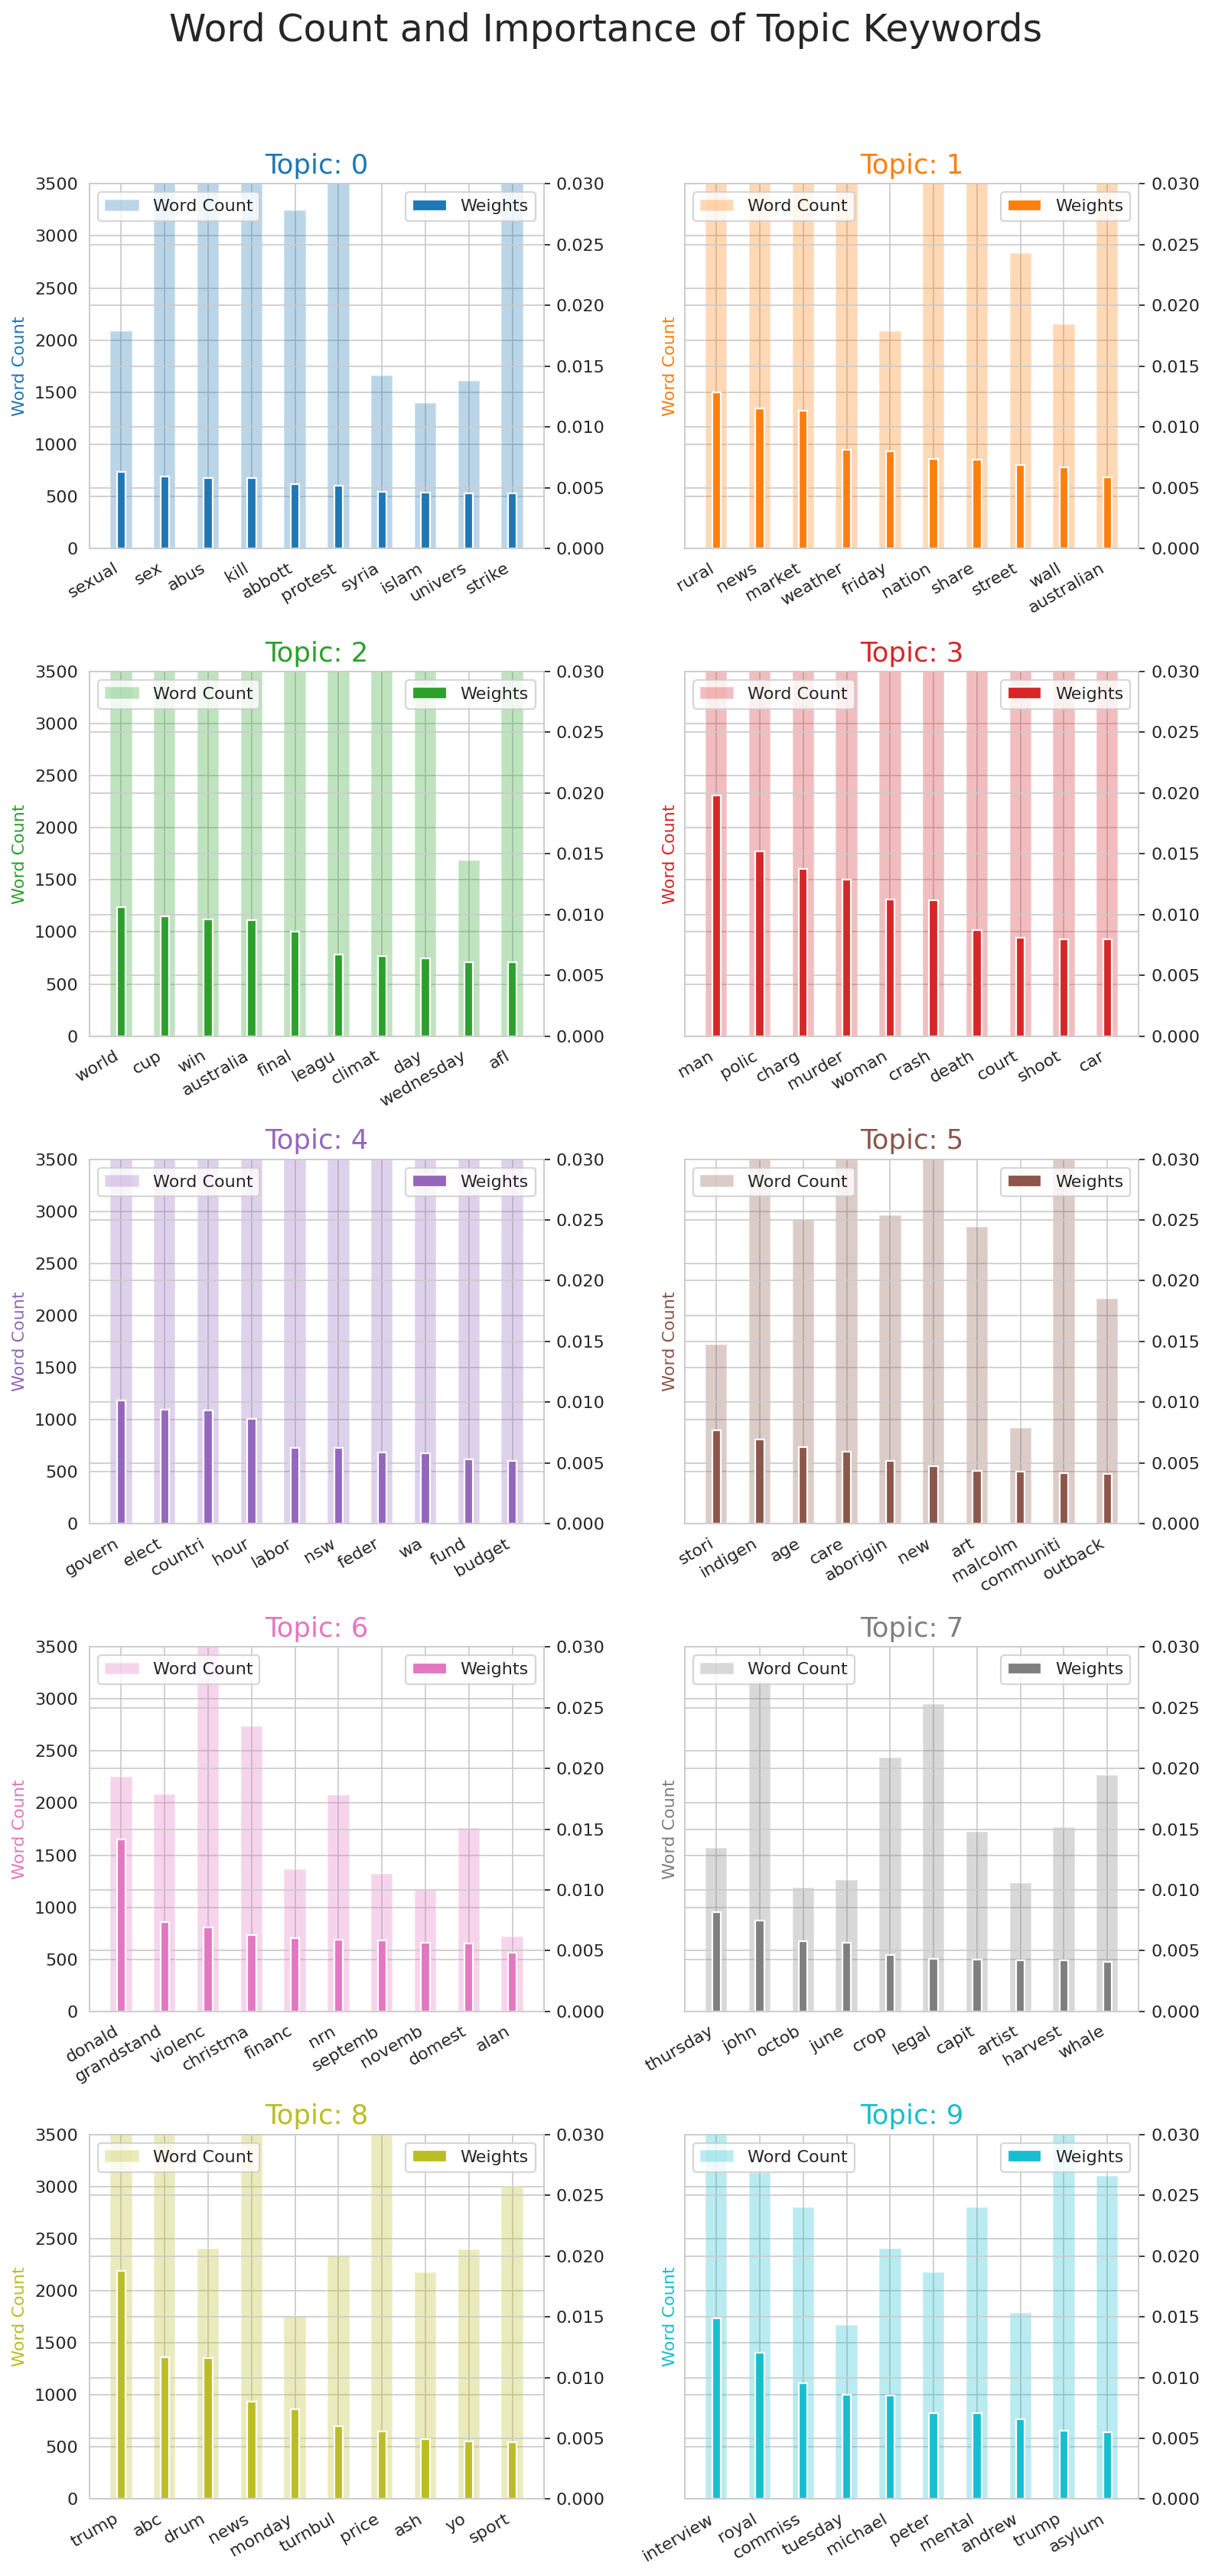

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in processed_text for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5,2, figsize=(10,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

visualise the information contained in a topic model.

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, tfidf_matrix, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.021110  0.160910       1        1  13.614939
3     -0.224283 -0.169942       2        1  12.139366
2      0.193146 -0.259789       3        1  10.887823
5      0.023381  0.138962       4        1   9.949861
0     -0.164990 -0.065189       5        1   9.782278
1      0.192479  0.008498       6        1   9.318517
8      0.053419  0.066419       7        1   9.250244
6      0.013861  0.050980       8        1   8.437017
7      0.038902  0.019562       9        1   8.377450
9     -0.104805  0.049588      10        1   8.242513, topic_info=        Term         Freq        Total Category  logprob  loglift
6768   trump  5607.000000  5607.000000  Default  30.0000  30.0000
297      man  7353.000000  7353.000000  Default  29.0000  29.0000
1333    news  4619.000000  4619.000000  Default  28.0000  28.0000
322   murder  4106.000000  4106.000000  Default  27.0000  27.0000
1627  donald  3049.000000  3049.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
6768   trump  1184.823853  5607.418457  Topic10  -5.1748   0.9414
1181   speak   811.732971  2553.740234  Topic10  -5.5530   1.3497
435      say   979.360229  6929.324219  Topic10  -5.3653   0.5392
280   health   786.137024  3137.502197  Topic10  -5.5850   1.1118
2798   video   717.095276  1532.166138  Topic10  -5.6770   1.7366

[583 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2626      5  0.999355    abbott
4513      4  0.139428       abc
4513      7  0.860067       abc
346       1  0.123269  aborigin
346       4  0.876210  aborigin
...     ...       ...       ...
412       4  0.011047   zealand
412       5  0.065433   zealand
412       6  0.003399   zealand
412       9  0.005099   zealand
986       5  0.998876      zone

[1552 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 6, 1, 2, 9, 7, 8, 10])